In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
clients_df = pd.read_csv('.\clientes\Sales_frequency_and_gmv_2022_01_27.csv')
customer_df =  pd.read_csv('.\clientes\customer.csv')
site_df = pd.read_csv('.\clientes\site.csv')

C:\Users\User\Documents\frubana\pruebas\timeChange\env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
customer_df.dtypes

batch_id                 int64
customer_id              int64
source_id                int64
site_id                  int64
country_id               int64
email_address           object
first_name              object
last_name               object
phone                   object
business_segment_id      int64
birth_date_id            int64
date_created_id          int64
date_updated_id          int64
identification_type     object
identification_value    object
archived                  bool
added_date              object
active                    bool
dtype: object

In [4]:
clients_df.dtypes

dim_customer          int64
full_date            object
subtotal            float64
number_purchases      int64
difference          float64
dtype: object

In [5]:
customer_df = customer_df.merge(site_df, left_on='site_id', right_on='site_id', how='left')[['customer_id', 'source_id',  'identifier_value', 'email_address', 'phone']]

In [6]:
clients_df['full_date'] = pd.to_datetime(clients_df['full_date'])

In [7]:
clients_df = clients_df[clients_df['dim_customer'] != 0]

In [8]:
clients_df = clients_df.merge(customer_df, left_on='dim_customer', right_on='customer_id', how='left')[['dim_customer', 'source_id', 'full_date', 'subtotal', 'number_purchases', 'difference',  'email_address', 'phone', 'identifier_value']]

In [26]:
#clients_df[clients_df['dim_customer'] == 146]

In [10]:
colors = {
    'Q0-Q1':'tab:red',
    'Q1-Q2':'tab:blue',
    'Q2-Q3':'tab:green',
    'Q3-Q4':'orange',
}

In [11]:
counter = clients_df.loc[clients_df.groupby(['dim_customer'])['full_date'].idxmax().reset_index().iloc[:,1]]

In [12]:
counter['quantile'] = pd.qcut(counter['number_purchases'], 4, labels=['Q0-Q1','Q1-Q2','Q2-Q3','Q3-Q4'])

In [13]:
counter['number_purchases'].describe()

count    91414.000000
mean         7.078456
std          7.681325
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         77.000000
Name: number_purchases, dtype: float64

In [14]:
counter['quantile'].value_counts()

Q0-Q1    29804
Q1-Q2    21259
Q2-Q3    20538
Q3-Q4    19813
Name: quantile, dtype: int64

([<matplotlib.patches.Wedge at 0x221d8015210>,
 [Text(0.9397648175125626, -0.5717010475463379, 'Q0-Q1'),
  Text(0.3900382458416753, 1.0285281555605317, 'Q1-Q2'),
  Text(-0.9670031748206022, 0.5243137036992989, 'Q2-Q3'),
  Text(-0.6924473095939332, -0.8547027105585449, 'Q3-Q4')])

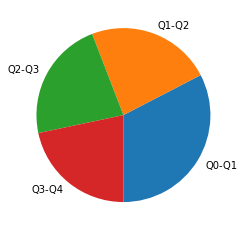

In [15]:
fig, ax = plt.subplots()
ax.pie(counter['quantile'].value_counts(), labels = counter['quantile'].value_counts().index, startangle=-90)

Text(0.5, 0, 'Number of Purchases')

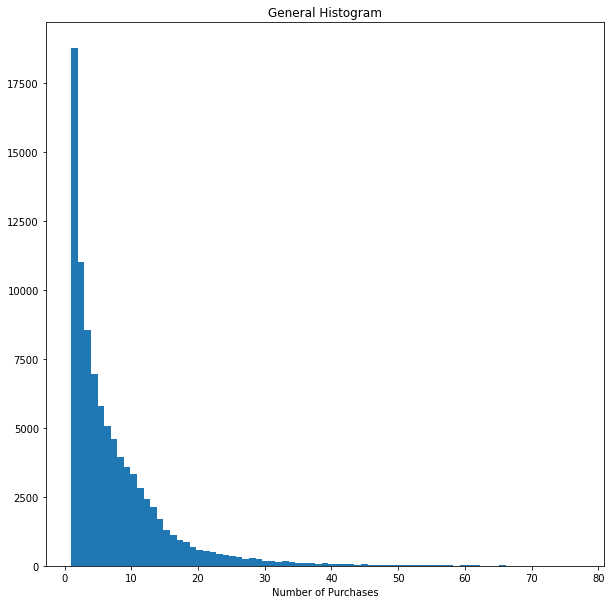

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(counter['number_purchases'], bins=77)
ax.set_title('General Histogram')
ax.set_xlabel('Number of Purchases')

Text(0.5, 1.0, 'Sao paulo Histogram')

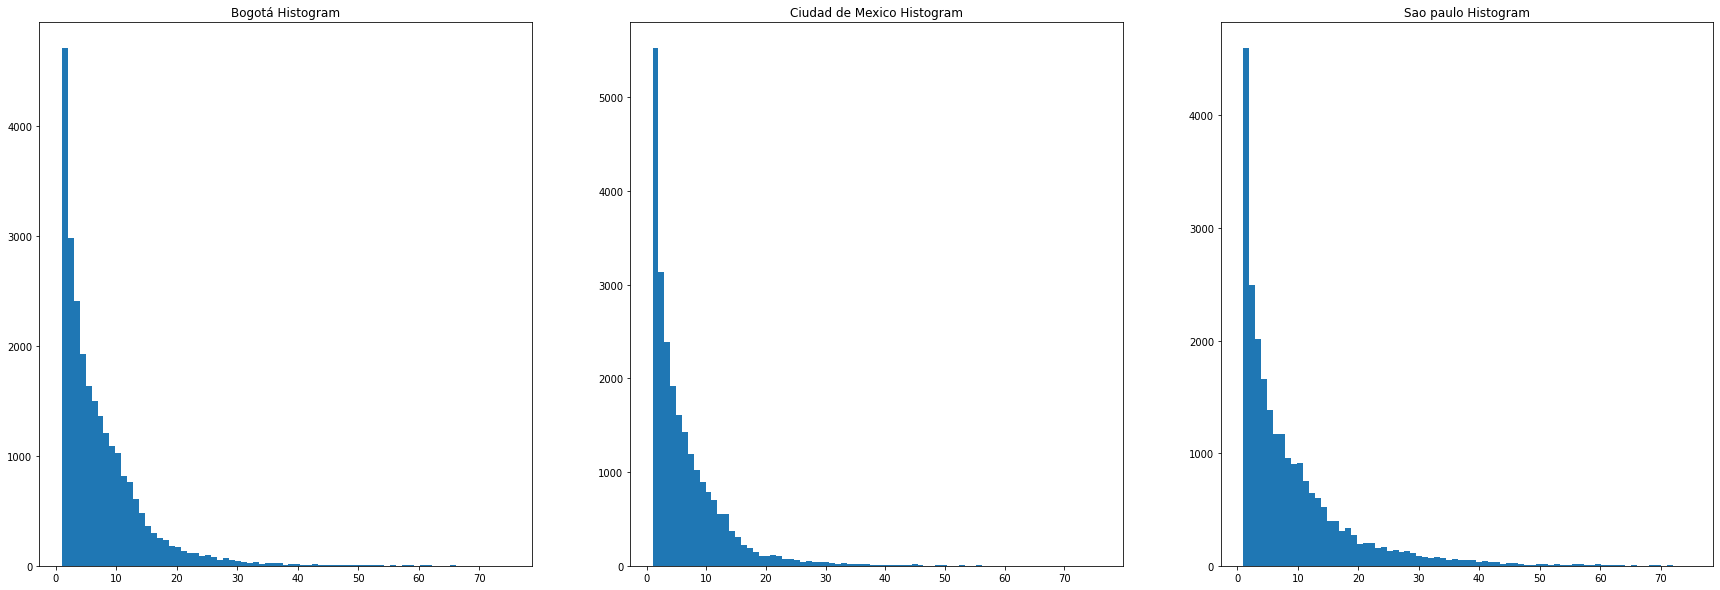

In [17]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].hist(counter[counter['identifier_value']=='BOG']['number_purchases'], bins=75)
ax[0].set_title('Bogotá Histogram')
ax[1].hist(counter[counter['identifier_value']=='CMX']['number_purchases'], bins=76)
ax[1].set_title('Ciudad de Mexico Histogram')
ax[2].hist(counter[counter['identifier_value']=='SPO']['number_purchases'], bins=75)
ax[2].set_title('Sao paulo Histogram')


In [18]:
counter[counter['identifier_value']=='BOG']['number_purchases'].describe()

count    25240.000000
mean         6.982171
std          7.098722
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         75.000000
Name: number_purchases, dtype: float64

In [19]:
counter[counter['identifier_value']=='CMX']['number_purchases'].describe()

count    24106.000000
mean         6.130590
std          6.547302
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         76.000000
Name: number_purchases, dtype: float64

In [20]:
counter[counter['identifier_value']=='SPO']['number_purchases'].describe()

count    24142.000000
mean         8.706197
std          9.602698
min          1.000000
25%          2.000000
50%          5.000000
75%         12.000000
max         75.000000
Name: number_purchases, dtype: float64

In [21]:
clients_df[(clients_df['number_purchases']>=10) & (clients_df['identifier_value']=='BOG')].groupby(['dim_customer'])['difference'].agg(stats.mode)

dim_customer
146         ([1.0], [5])
722         ([1.0], [2])
842         ([3.0], [8])
846         ([3.0], [3])
1026        ([5.0], [5])
               ...      
2345099     ([7.0], [5])
2345867    ([1.0], [22])
2359307     ([1.0], [3])
2375531     ([2.0], [5])
2387467     ([1.0], [6])
Name: difference, Length: 6416, dtype: object

<AxesSubplot:>

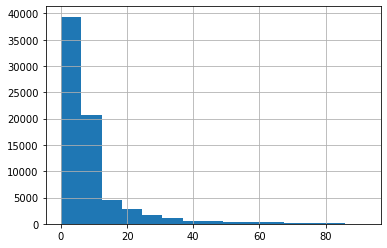

In [22]:
clients_df[(clients_df['number_purchases']>=0) ].groupby(['dim_customer'])['difference'].agg(stats.mode).apply(lambda x: x[0][0]).hist(bins=15)

In [23]:
gmv = clients_df.groupby(['dim_customer']).sum().reset_index()[['dim_customer', 'subtotal']]

In [24]:
#gmv['quantile'] = pd.qcut(counter['number_purchases'], 4, labels=['Q0-Q1','Q1-Q2','Q2-Q3','Q3-Q4'])

In [25]:
gmv['subtotal'].describe()

count    9.141400e+04
mean     4.462356e+05
std      2.305241e+06
min      1.500000e-01
25%      1.119582e+03
50%      5.162747e+03
75%      3.080206e+05
max      3.622990e+08
Name: subtotal, dtype: float64